# ASSIGNMENT - 2 (Regression)

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [643]:
data=pd.read_csv(r"C:\Users\755ra\DAI_sem_course\tips (data for regression problem).csv")

In [645]:
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [647]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [649]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [651]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


-------

<Axes: xlabel='sex', ylabel='tip'>

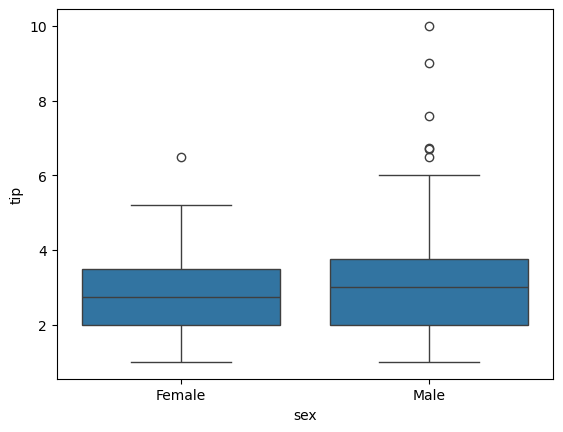

In [653]:
sns.boxplot(data=data,x="sex",y="tip") 

<Axes: xlabel='smoker', ylabel='tip'>

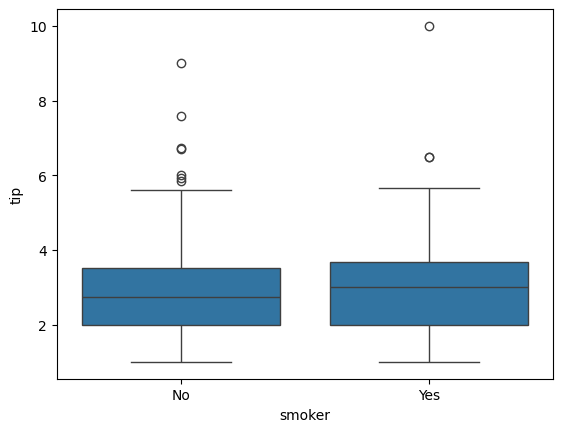

In [655]:
sns.boxplot(data=data,x="smoker",y="tip")

<Axes: xlabel='day', ylabel='tip'>

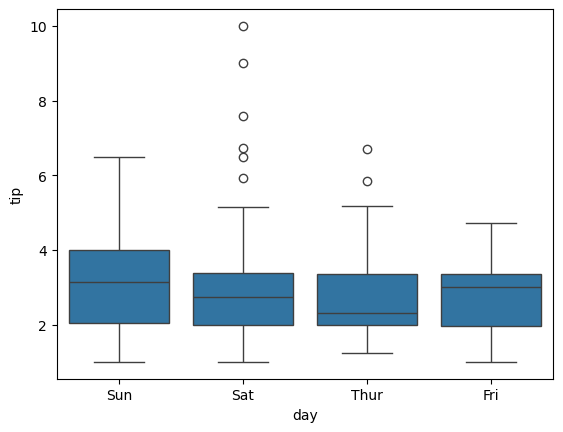

In [657]:
sns.boxplot(data=data,x="day",y="tip")

------------

In [670]:
le = LabelEncoder()        # Encoding , converting our categorical columns into numerical columns , using Label Encoder

for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype == 'bool':  
        data[column] = le.fit_transform(data[column]).astype(int) 

In [672]:
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3


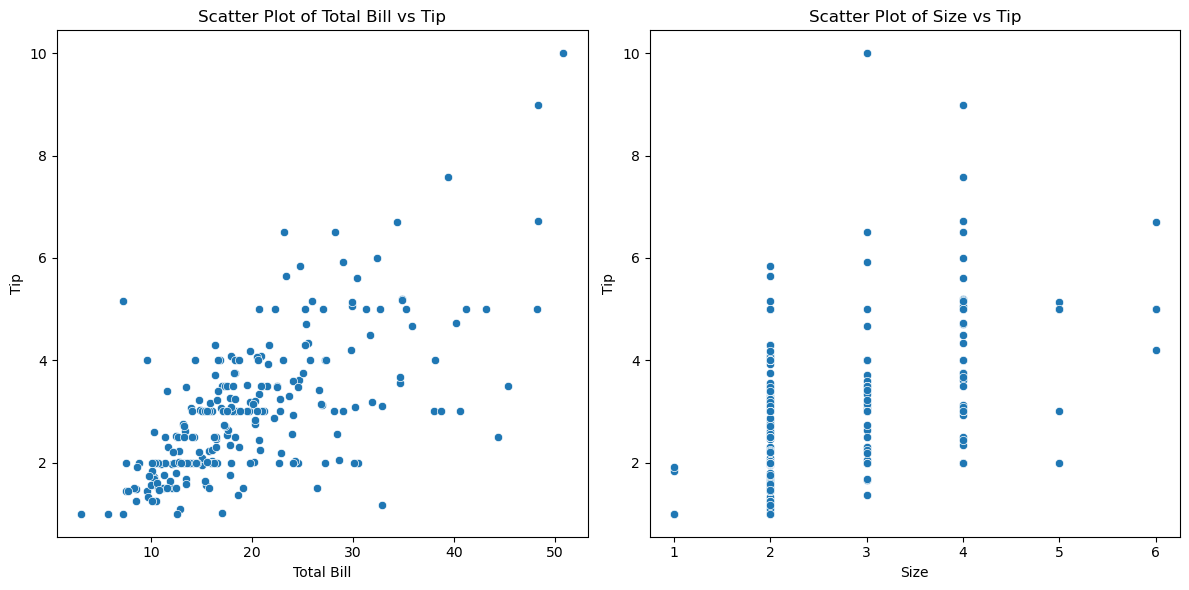

In [663]:
# Scatter Plots

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel('Total Bill')
plt.ylabel('Tip')


plt.subplot(1, 2, 2) 
sns.scatterplot(data=data, x='size', y='tip')
plt.title("Scatter Plot of Size vs Tip")
plt.xlabel('Size')
plt.ylabel('Tip')

plt.tight_layout()
plt.show()

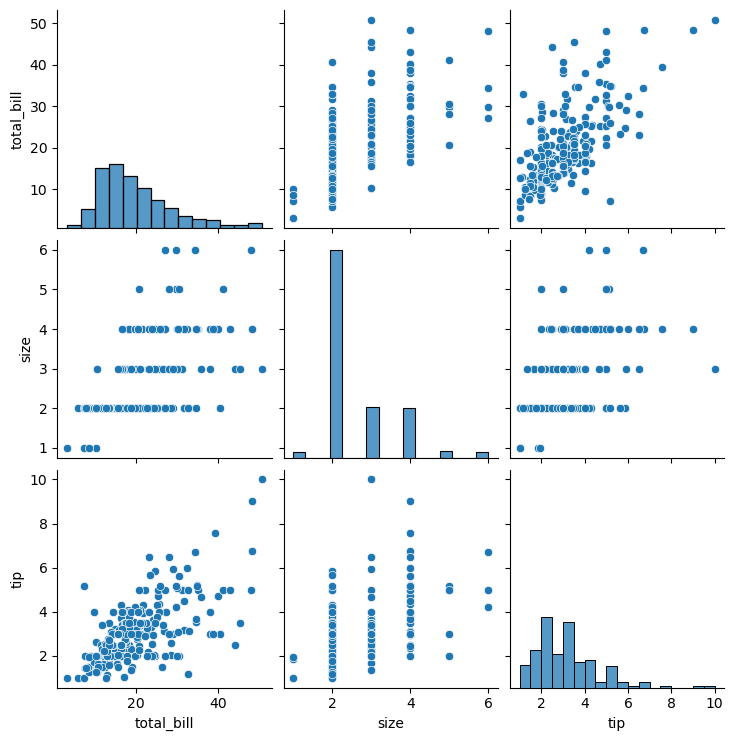

In [665]:
# Pair Plots of various features

sns.pairplot(data[['total_bill', 'size', 'tip']])
plt.show()

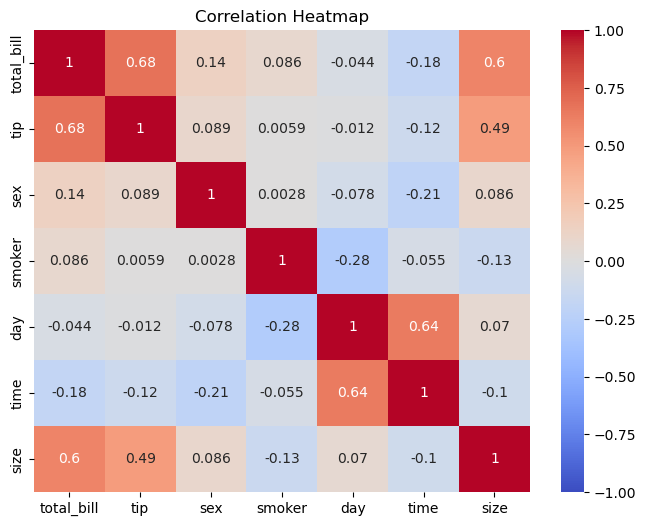

In [666]:
# Correlation Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

-------------

In [474]:
# Sepating into input and output variables

x=data.drop('tip',axis=1)   # input variable
y=data['tip']               # output variable

In [475]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

------

## Linear Regression

In [447]:
from sklearn.linear_model import LinearRegression

In [449]:
lr=LinearRegression()

In [451]:
lr.fit(x_train,y_train)

LinearRegression()

In [453]:
y_pred_lr=lr.predict(x_test)

In [455]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [457]:
print(f"Linear Regression :-\n Mean Absolute Error : {mae_lr},\n R² Score : {r2_lr}")

Linear Regression :-
 Mean Absolute Error : 0.6671331480264893,
 R² Score : 0.43730181943482516


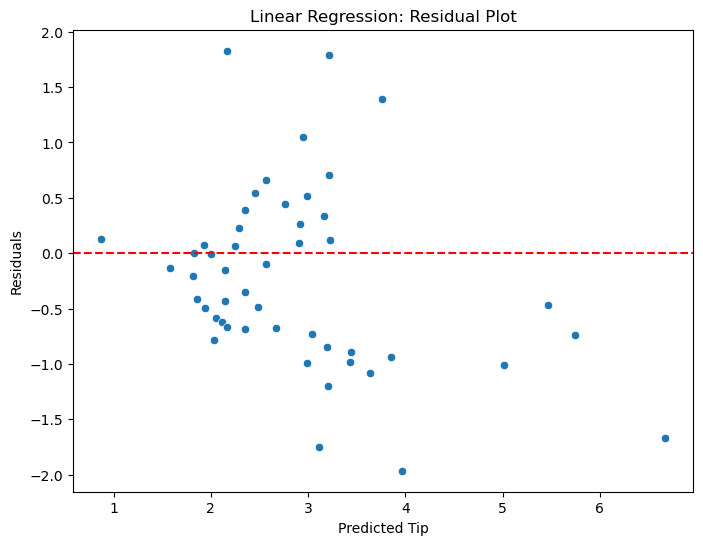

In [459]:
# Residual Plot

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.show()

------

## Ridge Regularization

In [135]:
from sklearn.linear_model import Ridge

In [137]:
ridge_reg = Ridge(alpha=1.0)

In [141]:
ridge_reg.fit(x_train, y_train)

Ridge()

In [145]:
y_pred_ridge = ridge_reg.predict(x_test)

In [147]:
mae_rr = mean_absolute_error(y_test, y_pred_ridge)
r2_rr = r2_score(y_test, y_pred_ridge)

In [149]:
print(f"Ridge Regression :-\n Mean Absolute Error : {mae_rr},\n R² Score : {r2_rr}")

Ridge Regression :-
 Mean Absolute Error : 0.6665379965588628,
 R² Score : 0.4393889716178484


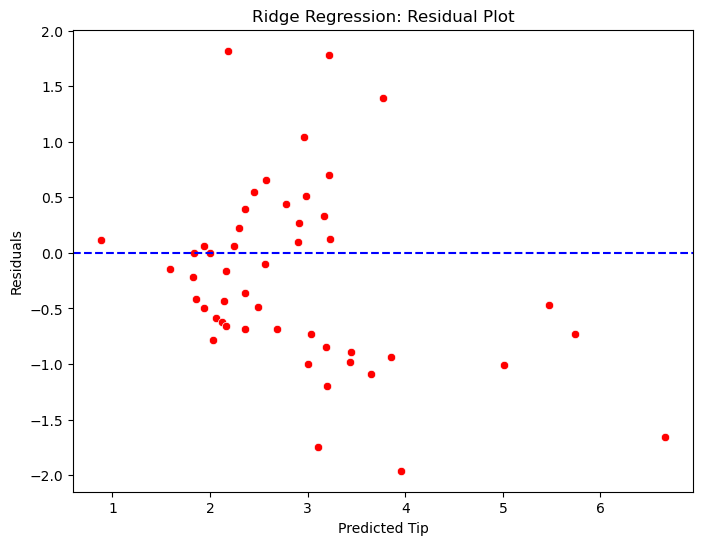

In [584]:
# Residual Plot

residuals_rr = y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_rr,color='r')
plt.title("Ridge Regression: Residual Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='blue', linestyle='--')
plt.show()

---

## Lasso Regularization

In [165]:
from sklearn.linear_model import Lasso

In [171]:
lasso_reg = Lasso(alpha=0.1)

In [173]:
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1)

In [175]:
y_pred_lasso = lasso_reg.predict(x_test)

In [177]:
mae_lasso_r = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso_r = r2_score(y_test, y_pred_lasso)

In [179]:
print(f"Lasso Regression :-\n Mean Absolute Error : {mae_lasso_r},\n R² Score : {r2_lasso_r}")

Lasso Regression :-
 Mean Absolute Error : 0.6374841046500827,
 R² Score : 0.5273068720881755


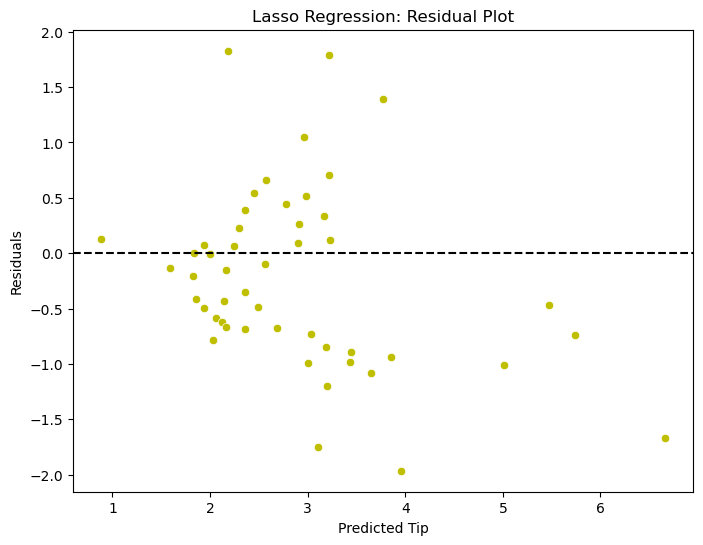

In [181]:
# Residual Plot

residuals_lasso_r = y_test - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_rr,color='y')
plt.title("Lasso Regression: Residual Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.show()

------------

## Decision Tree Regression

In [185]:
from sklearn.tree import DecisionTreeRegressor

In [195]:
dt= DecisionTreeRegressor(random_state=42)

In [197]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [199]:
y_pred_dt = dt.predict(x_test)

In [201]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [203]:
print(f"Decision Tree Regression :-\n Mean Absolute Error : {mae_dt},\n R² Score : {r2_dt}")

Decision Tree :-
 Mean Absolute Error : 0.8295918367346939,
 R² Score : -0.004178121600921791


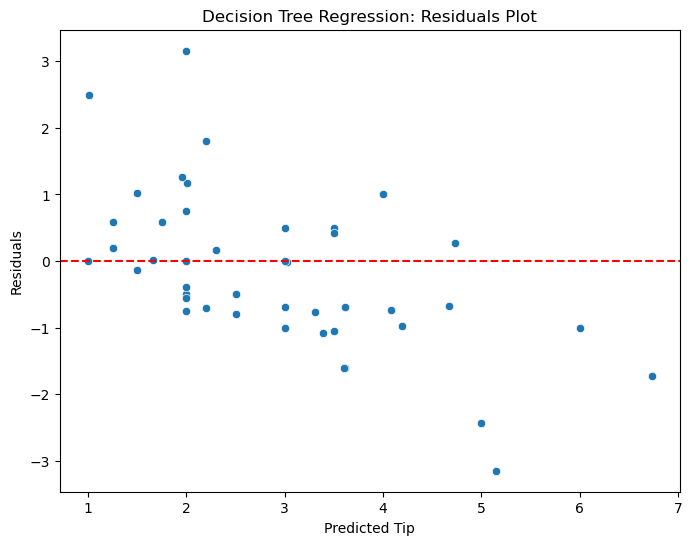

In [207]:
# Residual Plot

residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_dt, y=residuals_dt)
plt.title("Decision Tree Regression: Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [610]:
# Feature importance from Decision Tree

importance = dt.feature_importances_

features =x.columns
importance_df_dt = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df_dt.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df_dt)

      Feature  Importance
0  total_bill    0.780204
3  smoker_Yes    0.061290
1        size    0.052071
4     day_Sat    0.030390
5     day_Sun    0.027137
2    sex_Male    0.026608
6    day_Thur    0.017661
7  time_Lunch    0.004639


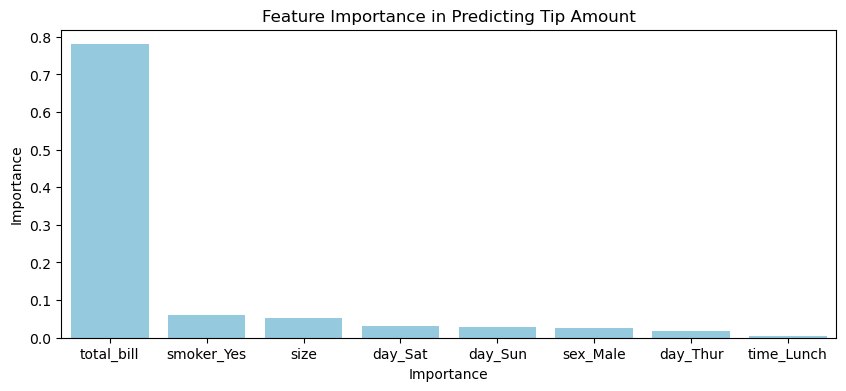

In [602]:
# Plotting Feature Importance Graph

plt.figure(figsize=(10, 4))
sns.barplot(y=importance_df_dt['Importance'],x= importance_df_dt['Feature'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Tip Amount')
plt.show()

Form the plot it is clear that decision tree model has given more importance to total bill feature.

------------------

## Random Forest Regression

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [223]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [225]:
y_pred_rf = rf.predict(x_test)

In [227]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [229]:
print(f"Random Forest Regression :-\n Mean Absolute Error : {mae_rf},\n R² Score : {r2_rf}")

Random Forest Regression :-
 Mean Absolute Error : 0.7557163265306125,
 R² Score : 0.2642455218065466


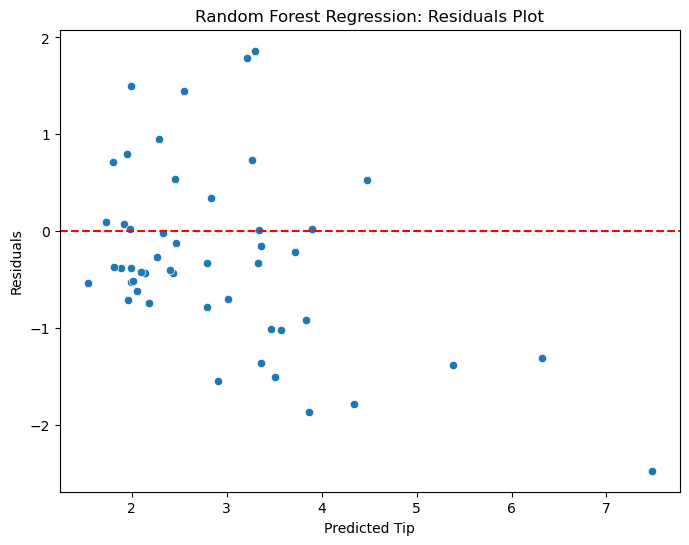

In [231]:
# Residual Plot

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.title("Random Forest Regression: Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [606]:
# Feature importance from Random Forest

importance = rf.feature_importances_

features =x.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df_rf.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df_rf)

      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


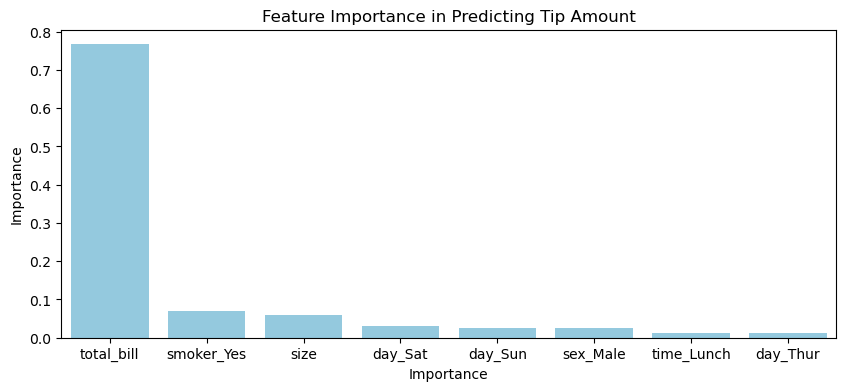

In [608]:
# Plotting Feature Importance Graph

plt.figure(figsize=(10, 4))
sns.barplot(y=importance_df_rf['Importance'],x= importance_df_rf['Feature'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Tip Amount')
plt.show()

Form the plot it is clear that random forest model has given more importance to total bill feature.

------------------

## Suppot Vector Regressor

In [235]:
from sklearn.svm import SVR

In [243]:
svr= SVR(kernel='rbf')

In [245]:
svr.fit(x_train, y_train)

SVR()

In [247]:
y_pred_svr = svr.predict(x_test)

In [249]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [251]:
print(f"Suppot Vector Regression :-\n Mean Absolute Error : {mae_svr},\n R² Score : {r2_svr}")

Suppot Vector Regression :-
 Mean Absolute Error : 0.5679864502285389,
 R² Score : 0.5740891915042663


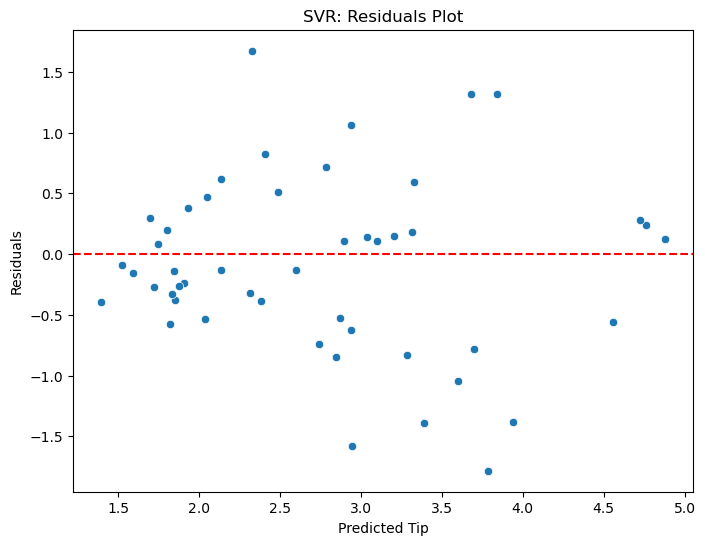

In [253]:
# Residual Plot

residuals_svr = y_test - y_pred_svr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_svr, y=residuals_svr)
plt.title("SVR: Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.show()

----------------------------

## KNN Regression

In [258]:
from sklearn.neighbors import KNeighborsRegressor

In [268]:
knn= KNeighborsRegressor(n_neighbors=5)

In [270]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [272]:
y_pred_knn = knn.predict(x_test)

In [274]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [276]:
print(f"KNN Regression :-\n Mean Absolute Error : {mae_svr},\n R² Score : {r2_svr}")

KNN Regression :-
 Mean Absolute Error : 0.5679864502285389,
 R² Score : 0.5740891915042663


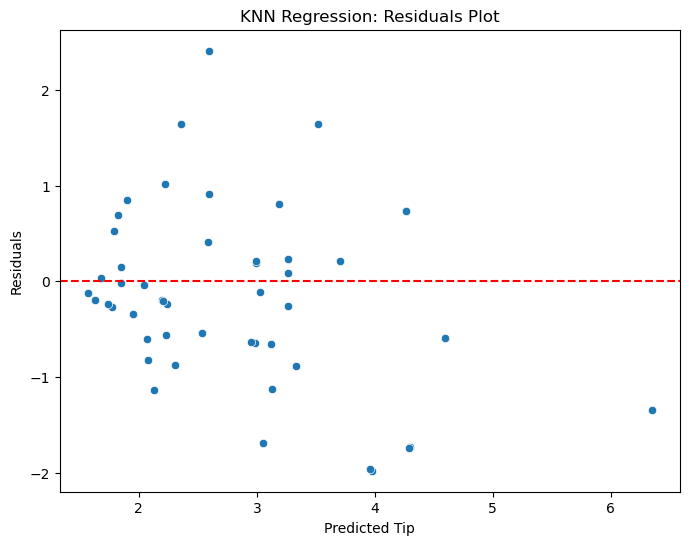

In [278]:
# Residual PLot

residuals_knn = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.title("KNN Regression: Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.axhline(0, color='r', linestyle='--')
plt.show()

------------------

In [612]:
# Stastical Test For Linearity (Rainbow Test)

x_train_sm = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_sm).fit()

rainbow_test_stat, rainbow_test_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic for Linear Regression : {rainbow_test_stat}")
print(f"Rainbow Test p-value for Linear Regression : {rainbow_test_p_value}")

Rainbow Test Statistic for Linear Regression : 1.549399494179733
Rainbow Test p-value for Linear Regression : 0.018647408553123152


------------

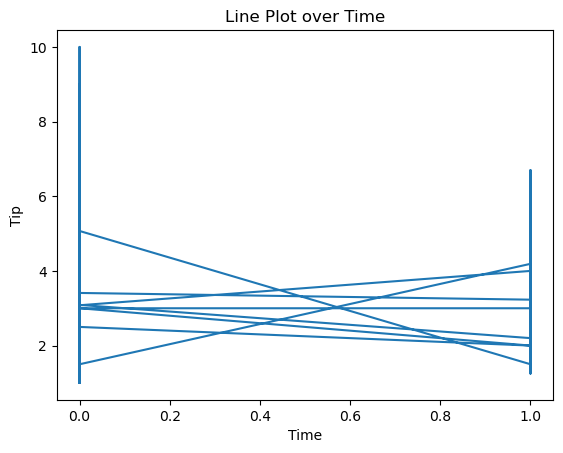

In [694]:
# Line plot (for time-series data)   ----> Plotted between tip and time

plt.plot(data['time'], data['tip'])
plt.title('Line Plot over Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

------------------

The model with low MAE and high R2 score indicates a better model.
In Rainbow Test,a p-value greater than 0.05 suggests that the model is adequately specified.

-----

## Conclusions

Total Bill and Size(of group of people) are the two major factors which significantly impacted tip amounts.

Out of all , Lasso Regression has a moderate balance between R2 Score and error (MAE) score. So, therfore will recommend this model for forecasting(predicting) tip amounts.

Some insights for management to improve customer service strategies and revenue management :-

1) Increase Bill Amounts: Focus on promoting higher-value items (e.g., desserts, drinks) to increase the total bill, as it significantly impacts tips amount.

2) Encourage Group Dining: Larger groups tend to give higher tips. Offer incentives for bigger bookings like discounts or complimentary items.


4) Offer Weekday Specials: Analyze and create targeted offers for weekdays to boost customer engagement and tipping.






